In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import linear_model
import numpy as np


In [2]:
# from gpx_to_csv import convert_all_gpx_to_csv, report
# gpx_dir = "./data/gpx/"
# csv_dir = "./data/csv/"
# convert_all_gpx_to_csv(gpx_dir, csv_dir)

In [3]:
data = pd.read_csv("./data/csv/paganella-bike-park.csv")
# data["lift?"].unique()

data

,Unnamed: 0,time,latitude,longitude,altitude,altitude_diff,relative_elevation,distance,cum_distance,speed,lift?,lift_path
0,0,2022-10-02 09:46:55+00:00,46.156385,10.955038,1524.084,0.000,0.000,0.00,0.00000,0.000000,0,0.0
1,1,2022-10-02 09:46:56+00:00,46.156384,10.955040,1521.207,-2.877,-2.877,0.19,0.00019,0.190000,0,0.0
2,2,2022-10-02 09:46:59+00:00,46.156368,10.955054,1521.017,-0.190,-3.067,2.08,0.00227,0.693333,0,0.0
3,3,2022-10-02 09:47:04+00:00,46.156375,10.955060,1521.209,0.192,-2.875,0.91,0.00318,0.182000,0,0.0
4,4,2022-10-02 09:47:06+00:00,46.156371,10.955066,1521.279,0.070,-2.805,0.64,0.00382,0.320000,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
10573,10573,2022-10-02 16:57:54+00:00,46.144351,10.965109,928.883,0.274,-595.201,0.68,57.21197,0.340000,0,0.0
10574,10574,2022-10-02 16:57:56+00:00,46.144371,10.965139,928.873,-0.010,-595.211,3.21,57.21518,1.605000,0,0.0
10575,10575,2022-10-02 16:57:59+00:00,46.144381,10.965139,928.897,0.024,-595.187,1.11,57.21629,0.370000,0,0.0
10576,10576,2022-10-02 16:58:01+00:00,46.144385,10.965150,929.043,0.146,-595.041,0.96,57.21725,0.480000,0,0.0


In [4]:
# Select relevant features (columns)
features = ["distance", "speed", "altitude_diff"]

# Define the target column
target = "lift?"

# Split the data into features (X) and target (y)
X = data[features]
X.replace([np.inf, -np.inf], 5, inplace=True)
y = data[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

/var/folders/61/dby95pn55tqdzyrv31gppc7c0000gn/T/ipykernel_20745/1536836557.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.replace([np.inf, -np.inf], 5, inplace=True)


In [5]:
# Display the shape of the training and testing sets
print("x_train shape:", X_train.shape)
print("x_test shape:", X_test.shape)


x_train shape: (8462, 3)
x_test shape: (2116, 3)


In [6]:
model_lr = linear_model.LogisticRegression(
    multi_class="multinomial", solver="lbfgs", max_iter=120, verbose=True)
model_lr.fit(X_train, y_train)

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.86541D+03    |proj g|=  1.78161D+04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     37     58      1     0     0   1.500D-05   5.022D-04
  F =   5.0217887967961045E-004

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.


LogisticRegression(max_iter=120, multi_class='multinomial', verbose=True)

In [7]:
y_pred = model_lr.predict(X_test)

In [8]:
# print(y_pred)
print(y_test)


5357    0
6595    0
9605    0
8147    0
7780    0
       ..
9824    0
2613    0
323     0
9969    0
1097    0
Name: lift?, Length: 2116, dtype: int64


In [9]:
# accuracy
model_lr.score(X_test, y_test)


1.0

In [10]:
y_pred = model_lr.predict(X_test)
# y_pred = y_pred.reshape(-1, 1)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [11]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 1.0


In [12]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
confusion_matrix


array([[2114,    0],
       [   0,    2]])

Text(33.22222222222222, 0.5, 'Truth or Actual Value')

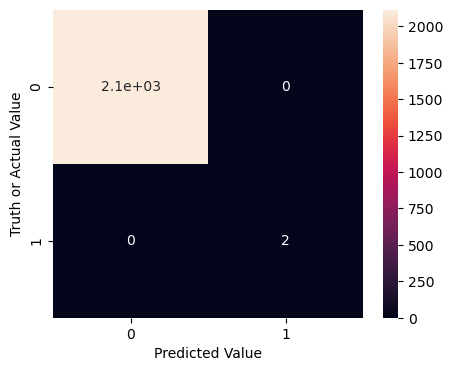

In [13]:
import seaborn as sn
from matplotlib import pyplot as plt
plt.figure(figsize=(5, 4))
sn.heatmap(confusion_matrix, annot=True)
plt.xlabel("Predicted Value")
plt.ylabel("Truth or Actual Value")


## Random Forest


In [14]:
from sklearn.ensemble import RandomForestClassifier

# Create a Random Forest classifier
model_rf = RandomForestClassifier(random_state=42)

# Train the model
model_rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [15]:
# Evaluate the model on the testing set
y_pred = model_rf.predict(X_test)

# accuracy
accuracy = model_rf.score(y_test, y_pred)
print("RF Model Accuracy:", accuracy)

/Users/nimakarimi/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


ValueError: Expected 2D array, got 1D array instead:
array=[0. 0. 0. ... 0. 0. 0.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [16]:
from sklearn.metrics import classification_report, confusion_matrix
# Print classification report and confusion matrix
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      2114
           1       1.00      1.00      1.00         2

    accuracy                           1.00      2116
   macro avg       1.00      1.00      1.00      2116
weighted avg       1.00      1.00      1.00      2116

Confusion Matrix:
 [[2114    0]
 [   0    2]]


In [20]:
new_data = pd.read_csv("./data/csv_train/lake-to-lake.csv")
new_data.replace([np.inf, -np.inf], 5, inplace=True)

print("before \n", new_data)

# Use the trained model to predict
predicted_lift_usage = model_lr.predict(new_data[features])

# Add the predictions as a new column to the new_data DataFrame
new_data["predicted_lift_usage_lr"] = predicted_lift_usage

# Display the new_data DataFrame with predictions
print(new_data["lift?"].sum())
print(new_data.predicted_lift_usage_lr.sum())

new_data.to_csv("./data/new_data.csv", index=True)

before 
                            time   latitude  longitude  altitude  \
0     2019-05-24 15:20:39+00:00  46.144488  10.965288   897.718   
1     2019-05-24 15:20:59+00:00  46.151613  10.960642  1363.398   
2     2019-05-24 15:21:19+00:00  46.151873  10.960611  1375.017   
3     2019-05-24 15:21:39+00:00  46.151969  10.960986  1375.008   
4     2019-05-24 15:21:59+00:00  46.151988  10.961238  1371.074   
...                         ...        ...        ...       ...   
2093  2019-05-25 02:58:19+00:00  46.143950  10.964650   889.137   
2094  2019-05-25 02:58:39+00:00  46.144120  10.964850   890.298   
2095  2019-05-25 02:58:59+00:00  46.144180  10.965000   890.330   
2096  2019-05-25 02:59:19+00:00  46.144210  10.965110   890.575   
2097  2019-05-25 02:59:39+00:00  46.144337  10.965321   893.717   

      altitude_diff  relative_elevation  distance  cum_distance    speed  \
0             0.000               0.000      0.00       0.00000   0.0000   
1           465.680             46

## Neural_network


In [23]:
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create MLP model
model = MLPClassifier(hidden_layer_sizes=(
    16, 8), activation="relu", solver="adam", random_state=1)

# Train model
model.fit(X_train, y_train)

# Evaluate model
print(model.score(X_test, y_test))

# Make predictions

new_data = pd.read_csv("./data/csv_train/lake-to-lake.csv")[features]

new_data = scaler.transform(new_data)
predictions = model.predict(new_data)
predictions

1.0


array([0, 0, 0, ..., 0, 0, 0])

## SVC


In [26]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load data
data = pd.read_csv("./data/csv_train/paganella-bike-enduro-t2t.csv")
features = ["distance", "speed", "altitude_diff"]

target = "lift?"

X = data[features]
X.replace([np.inf, -np.inf], 5, inplace=True)
y = data["lift?"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create SVM classifier
model = SVC(kernel="rbf", C=1.0, gamma=0.1)

# Train model
model.fit(X_train, y_train)

# Evaluate model
print("accuracy:", model.score(X_test, y_test))

# # Make predictions
new_data = pd.read_csv("./data/csv_train/lake-to-lake.csv")
new_data = scaler.transform(new_data[features])
predictions = model.predict(new_data)
predictions


accuracy: 0.996


/var/folders/61/dby95pn55tqdzyrv31gppc7c0000gn/T/ipykernel_20745/2446191896.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.replace([np.inf, -np.inf], 5, inplace=True)


array([0, 0, 0, ..., 0, 0, 0])

In [27]:
import sweetviz as sv
import pandas as pd

# Generating report
data = pd.read_csv("./data/csv/paganella-bike-park.csv")
data = data.drop(["Unnamed: 0", "time"], axis=1)

# report = sv.analyze(data, target_feat="lift_path")
# report.show_html()

data.columns


Index(['latitude', 'longitude', 'altitude', 'altitude_diff',
       'relative_elevation', 'distance', 'cum_distance', 'speed', 'lift?',
       'lift_path'],
      dtype='object')

/var/folders/61/dby95pn55tqdzyrv31gppc7c0000gn/T/ipykernel_20745/1943277365.py:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  g = sns.clustermap(data.corr(),


done


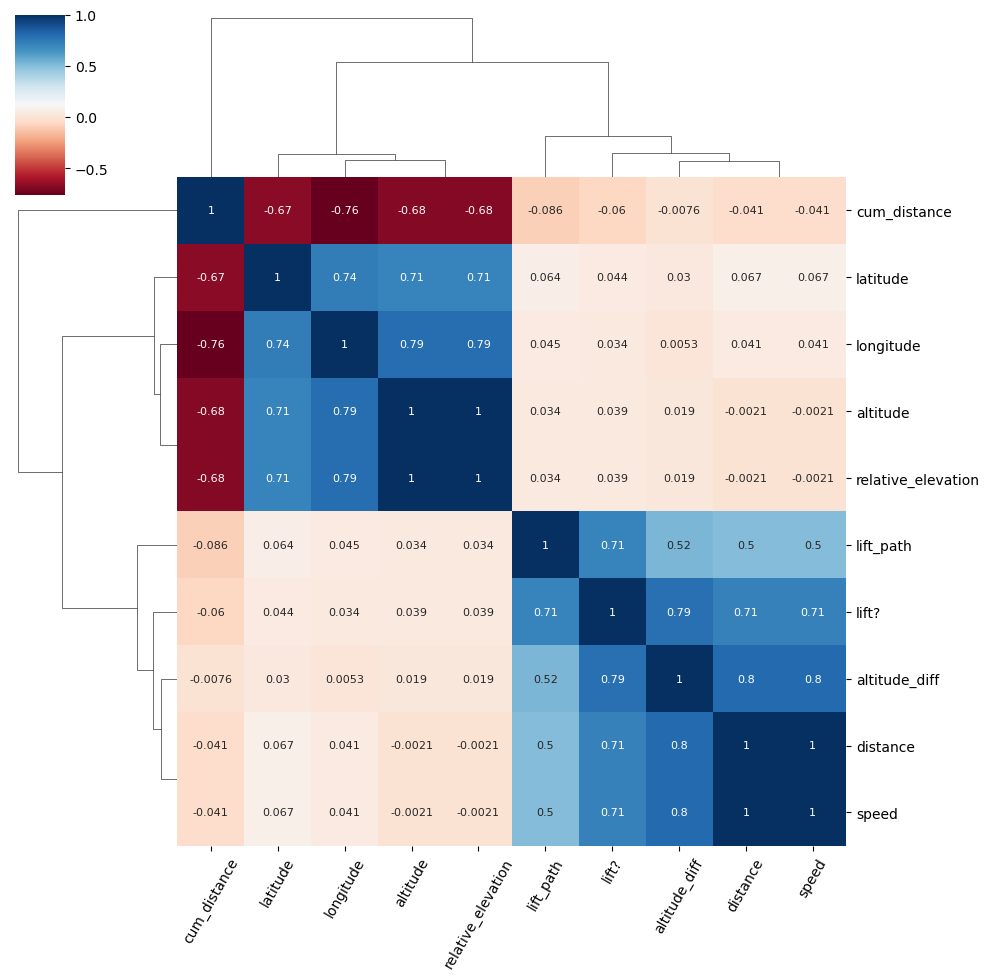

In [29]:
# * correlation plot
import seaborn as sns
import matplotlib.pyplot as plt
data = pd.read_csv("./data/csv_train/lake-to-lake.csv")

g = sns.clustermap(data.corr(),
                   method="complete",
                   cmap="RdBu",
                   annot=True,
                   annot_kws={"size": 8})
plt.setp(g.ax_heatmap.get_xticklabels(), rotation=60)
print("done")

### ROC


In [63]:
y_pred[:500].shape

(500,)

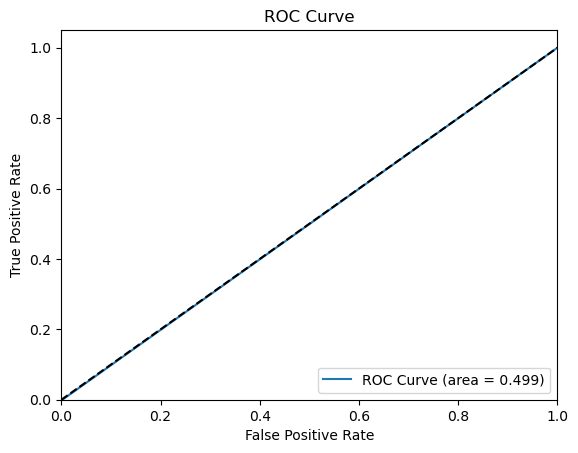

In [73]:
from sklearn.metrics import roc_curve, roc_auc_score



# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred[:500])

# Calculate AUC
auc = roc_auc_score(y_test, y_pred[:500])

# Plot ROC curve
plt.plot(fpr, tpr, label='ROC Curve (area = %0.3f)' % auc)
plt.plot([0, 1], [0, 1], 'k--') # random predictions curve
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()